In [19]:
import pandas as pd


In [20]:
df = pd.read_csv(r'./round1/prices_round_1_day_-2.csv',sep=';')

In [21]:
df.head()
df = df.fillna(0)

In [22]:
squid_df = df[df['product'] == 'SQUID_INK'].reset_index(drop=True)

In [24]:
squid_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,SQUID_INK,1998,26,0.0,0.0,0.0,0.0,2002,26,0.0,0.0,0.0,0.0,2000.0,0.0
1,-2,100,SQUID_INK,1999,5,1998.0,26.0,0.0,0.0,2001,20,0.0,0.0,0.0,0.0,2000.0,0.0
2,-2,200,SQUID_INK,1997,31,0.0,0.0,0.0,0.0,2000,1,2001.0,30.0,0.0,0.0,1998.5,0.0
3,-2,300,SQUID_INK,1997,27,0.0,0.0,0.0,0.0,2000,27,0.0,0.0,0.0,0.0,1998.5,0.0
4,-2,400,SQUID_INK,1996,20,0.0,0.0,0.0,0.0,2000,20,0.0,0.0,0.0,0.0,1998.0,0.0


In [25]:
bvol1 = squid_df['bid_volume_1']
bvol2 = squid_df['bid_volume_2']
bvol3 = squid_df['bid_volume_3']
avol1 = squid_df['ask_volume_1']
avol2 = squid_df['ask_volume_2']
avol3 = squid_df['ask_volume_3']

In [26]:
import matplotlib.pyplot as plt 


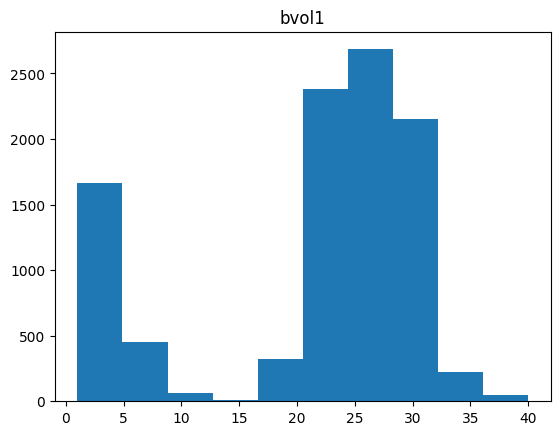

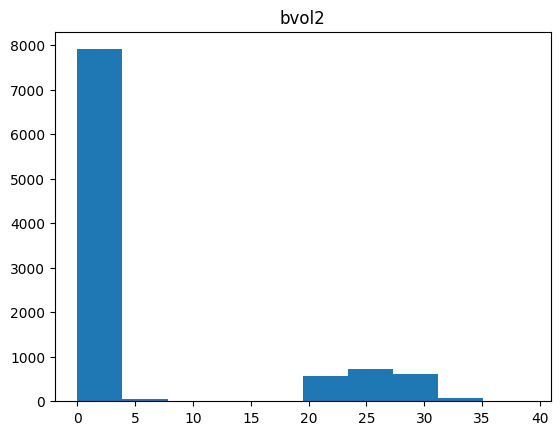

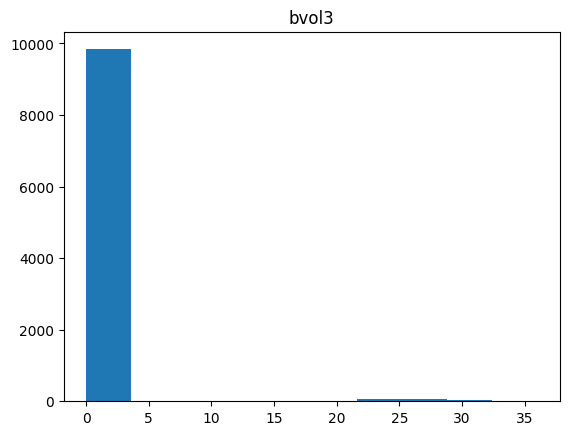

In [30]:
plt.hist(bvol1,label='bvol1')
plt.title('bvol1')
plt.show()
plt.hist(bvol2,label='bvol2')
plt.title('bvol2')
plt.show()
plt.hist(bvol3,label='bvol3')
plt.title('bvol3')
plt.show()

In [35]:
def getAvg(row):
    prices = []
    prices.append(row['bid_volume_1'])
    prices.append(row['bid_volume_2'])
    prices.append(row['bid_volume_3'])
    maxVol = prices.index(max(prices))
    bidColumn = 'bid_price_'+str(maxVol+1)
    bidPrice = row[bidColumn]
    prices = []
    prices.append(row['ask_volume_1'])
    prices.append(row['ask_volume_2'])
    prices.append(row['ask_volume_3'])
    maxVol = prices.index(max(prices))
    askColumn = 'ask_price_' + str(maxVol+1)
    askPrice = row[bidColumn]
    return int((bidPrice+askPrice)/2)
    

In [36]:
squid_df['fair price'] = squid_df.apply(lambda row: getAvg(row), axis=1)

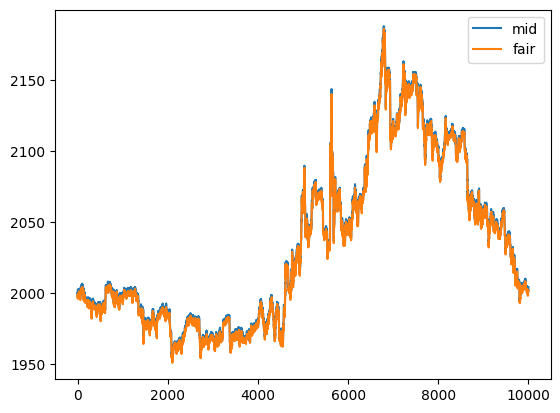

In [37]:
plt.plot(range(len(squid_df)),squid_df['mid_price'],label='mid')
plt.plot(range(len(squid_df)),squid_df['fair price'],label='fair')
plt.legend()
plt.show()

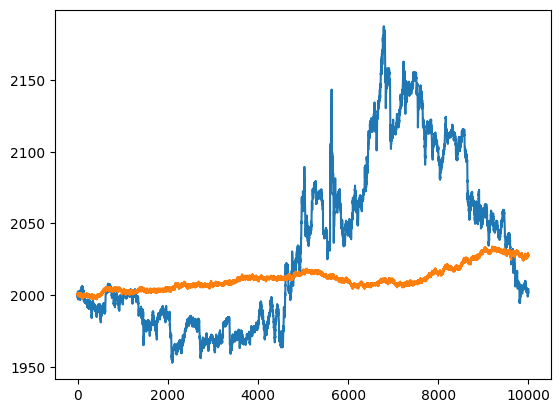

In [41]:
kelpPrices = df[df['product'] == 'KELP']['mid_price']
squidPrices = squid_df['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [58]:
df2 = pd.read_csv(r'./round1/prices_round_1_day_-1.csv',sep=';')

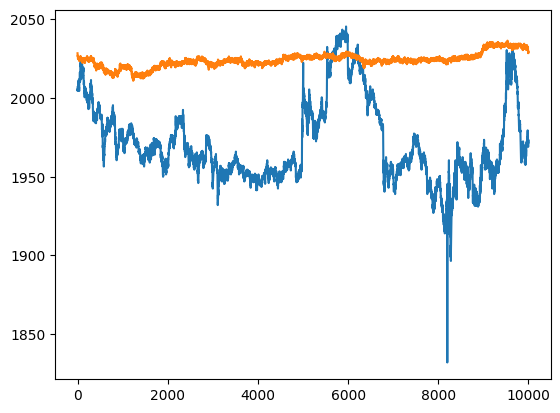

In [59]:
kelpPrices = df2[df2['product'] == 'KELP']['mid_price']
squidPrices = df2[df2['product'] == 'SQUID_INK']['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [60]:
df3 = pd.read_csv(r'./round1/prices_round_1_day_0.csv',sep=';')

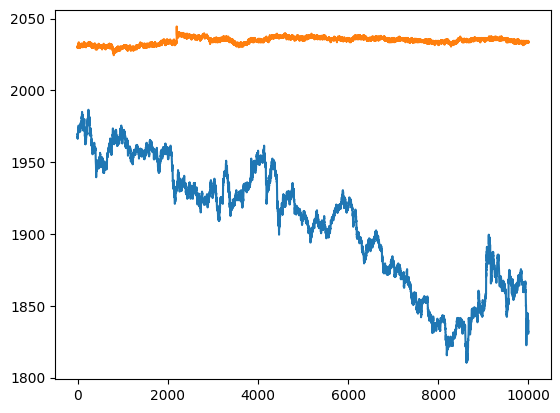

In [61]:
kelpPrices = df3[df3['product'] == 'KELP']['mid_price']
squidPrices = df3[df3['product'] == 'SQUID_INK']['mid_price']

plt.plot(range(len(squidPrices)),squidPrices)
plt.plot(range(len(kelpPrices)),kelpPrices)
plt.show()

In [76]:
squid_df2 = df2[df2['product'] == 'SQUID_INK'].reset_index(drop=True)
squid_df3 = df3[df3['product'] == 'SQUID_INK'].reset_index(drop=True)

In [83]:
squid_df['bid_price_1'].describe()

count    10000.000000
mean      2032.589200
std         58.206986
min       1951.000000
25%       1982.000000
50%       2013.000000
75%       2071.000000
max       2187.000000
Name: bid_price_1, dtype: float64

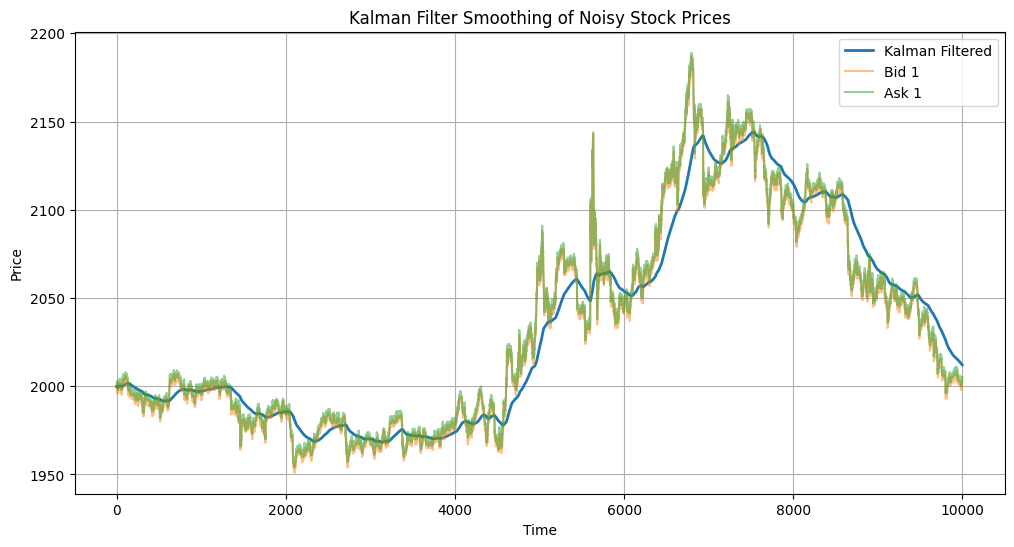

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fake stock price data
np.random.seed(0)
true_price = np.linspace(100, 120, 100)  # true trend
noise = np.random.normal(0, 2, size=100)  # market noise
observed_price = true_price + noise

bid1 = squid_df['bid_price_1']
ask1 = squid_df['ask_price_1']

observed_price = squid_df['mid_price']
# Kalman Filter variables
n = len(observed_price)
predicted_price = np.zeros(n)

# Initial guesses
x = observed_price[0]     # initial estimate
P = 2                     # initial uncertainty
Q = 0.0001                # process variance
R = 4                    # measurement variance

# Kalman filter loop
for t in range(n):
    # Prediction step
    x_pred = x
    P_pred = P + Q

    # Update step
    K = P_pred / (P_pred + R)  # Kalman Gain
    x = x_pred + K * (observed_price[t] - x_pred)
    P = (1 - K) * P_pred

    predicted_price[t] = x

# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(observed_price, label='Observed (Noisy)', alpha=0.5)
plt.plot(predicted_price, label='Kalman Filtered', linewidth=2)
plt.plot(bid1,label='Bid 1', alpha=0.5)
plt.plot(ask1,label='Ask 1',alpha=0.5)
plt.legend()
plt.title('Kalman Filter Smoothing of Noisy Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [88]:
squid_df['mid_price'].iloc[-1]

np.float64(2004.0)